<div align="center">
    <h1>Taller de Computación Científica en Python - 2025</h1>
    <img src="https://www.iycr2014.org/__data/assets/image/0014/133052/logo_cenat.png" alt="Logo CENAT" style="width: 200px;"/>
    
</div>

---


## Herramientas de computación científica con SciPy

<center> <img src="https://interactivechaos.com/sites/default/files/inline-images/portada_tutorial_scipy.jpg" alt="image info" width="300"/> </center>

"*SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.*" —http://www.scipy.org
       
    
* Contiene funciones que ayudan a abordar problemas comunes de la computación científica.
* Trabaja en conjunto con NumPy.
* Entre sus módulos están:

<div align="center">

| Nombre       | Funciones relacionadas                       |
| :---:        | :---:                                        |
| misc         | Funciones no clasificadas                    |
| special      | Funciones especiales                         |
| fftpack      | Transformada de Fourier                      |
| integrate    | Integración y ecuaciones diferenciales       |
| interpolate  | Interpolación                                |
| io           | Input/Output, entrada y salida de datos      |
| linalg       | Álgebra lineal                               |
| ndimage      | Imágenes n-dimensionales                     |
| optimize     | Optimización                                 |
| signal       | Procesamiento de señales                     |
| stats        | Estadística                                  |
| spatial      | Estructuras de datos espaciales              |
| constants    | Constantes matemáticas y físicas             |

</div>



### Antes de implementar una rutina en su código, verifique si no existe ya una implementación en SciPy.

- Los submódulos son independientes entre si.

### Módulo scipy.linalg: Álgebra lineal
    
- Tiene operaciones *built-in* para trabajar con matrices.
- Posee métodos para calcular productos matriciales, de Kronecker, internos y externos, entre otros.
- Podemos determinar los valores propios y calcular funciones trigonométricas para matrices.
- También tiene funciones para crear matrices especiales. *Ejemplo:* circulante, convolución.

---

**Realizado por:**  
Johansell Villalobos y Julián Sánchez

In [1]:
# celda para acceder a archivos en Google Drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
import numpy as np
from scipy import linalg as la

In [4]:
la?

Type:        module
String form: <module 'scipy.linalg' from 'C:\\Users\\pelot\\AppData\\Local\\Packages\\PythonSoftwareFoundation <...> qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\scipy\\linalg\\__init__.py'>
File:        c:\users\pelot\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\scipy\linalg\__init__.py
Docstring:  
Linear algebra (:mod:`scipy.linalg`)

.. currentmodule:: scipy.linalg

.. toctree::
   :hidden:

   linalg.blas
   linalg.cython_blas
   linalg.cython_lapack
   linalg.interpolative
   linalg.lapack

Linear algebra functions.

.. eventually, we should replace the numpy.linalg HTML link with just `numpy.linalg`

.. seealso::

   `numpy.linalg <https://www.numpy.org/devdocs/reference/routines.linalg.html>`__
   for more linear algebra functions. Note that
   although `scipy.linalg` imports most of them, identically named
   functions from `scipy.linalg` may offer more or

In [5]:
matriz = np.random.rand(5,5)*10
matriz = matriz.astype(int)
print(matriz)

[[8 9 3 2 7]
 [2 4 2 5 6]
 [3 2 5 4 6]
 [5 4 2 1 6]
 [1 6 7 6 9]]


In [6]:
la.det(matriz) #Calcula el determinante de una matriz cuadrada

1715.0

In [7]:
la.inv(matriz) #Calcula la inversa de una matriz cuadrada

array([[ 0.11195335,  0.02040816,  0.2425656 , -0.09271137, -0.20058309],
       [ 0.1451895 , -0.02040816, -0.18542274, -0.13586006,  0.1148688 ],
       [ 0.08746356, -0.26530612,  0.18950437, -0.16618076,  0.09329446],
       [ 0.08396501,  0.26530612,  0.1819242 , -0.31953353, -0.15043732],
       [-0.23323615,  0.04081633, -0.17201166,  0.44314869,  0.0845481 ]])

In [8]:
la.tril(matriz)

array([[8, 0, 0, 0, 0],
       [2, 4, 0, 0, 0],
       [3, 2, 5, 0, 0],
       [5, 4, 2, 1, 0],
       [1, 6, 7, 6, 9]])

In [9]:
la.triu(matriz)

array([[8, 9, 3, 2, 7],
       [0, 4, 2, 5, 6],
       [0, 0, 5, 4, 6],
       [0, 0, 0, 1, 6],
       [0, 0, 0, 0, 9]])

In [10]:
vector = np.array([2,2,1])
la.norm(vector) #Calcula la norma del vector

3.0

También es posible calcular diferentes normas para un mismo arreglo.

In [11]:
?la.norm

Signature: la.norm(a, ord=None, axis=None, keepdims=False, check_finite=True)
Docstring:
Matrix or vector norm.

This function is able to return one of eight different matrix norms,
or one of an infinite number of vector norms (described below), depending
on the value of the ``ord`` parameter. For tensors with rank different from
1 or 2, only `ord=None` is supported.

Parameters
----------
a : array_like
    Input array. If `axis` is None, `a` must be 1-D or 2-D, unless `ord`
    is None. If both `axis` and `ord` are None, the 2-norm of
    ``a.ravel`` will be returned.
ord : {int, inf, -inf, 'fro', 'nuc', None}, optional
    Order of the norm (see table under ``Notes``). inf means NumPy's
    `inf` object.
axis : {int, 2-tuple of ints, None}, optional
    If `axis` is an integer, it specifies the axis of `a` along which to
    compute the vector norms. If `axis` is a 2-tuple, it specifies the
    axes that hold 2-D matrices, and the matrix norms of these matrices
    are computed. If 

In [12]:
vector2 = np.array([[2,2,1],
                    [3,4,1]])
la.norm(vector2, axis=0) #Norma a lo largo de las columnas

array([3.60555128, 4.47213595, 1.41421356])

## Solución de sistemas de ecuaciones

Un problema común es la resolución de sistemas lineales de tipo $$Ax = b$$

donde $A$ es una matriz cuadrada y $det(A)\neq0$

Por ejemplo el sistema:

$$\begin{array}{lcl} 2x + 3y & = & 6 \\ 4x + 9y & = & 15 \end{array}$$

$$\begin{bmatrix}
    2 & 4 \\
    4 & 9
\end{bmatrix}
\begin{bmatrix}
    x \\
    y
\end{bmatrix} =
\begin{bmatrix}
    6 \\
    15
\end{bmatrix}$$

In [13]:
#Primero definimos la matriz de coeficientes
matA = np.array([[2,3],
                 [4,9]])

#Luego, definimos el vector b o matriz de resultados
vectB = np.array([6,15]).reshape(2,1)
print(matA)
print(vectB)

[[2 3]
 [4 9]]
[[ 6]
 [15]]


In [14]:
#Finalmente, hacemos uso de la función solve de linalg
la.solve(matA, vectB)

array([[1.5],
       [1. ]])

SciPy incluye otros métodos de resolución de sistemas de ecuaciones como factorización LU o el método de Cholesky. Se pueden consultar [aquí](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg).

## Álgebra lineal para manipular objetos

In [15]:
from scipy import misc
import matplotlib.pyplot as plt

C:\Users\pelot\AppData\Local\Temp\ipykernel_17328\3567974141.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  mapache = misc.face() #Devuelve un array que corresponde a la imagen de la cara de un mapache


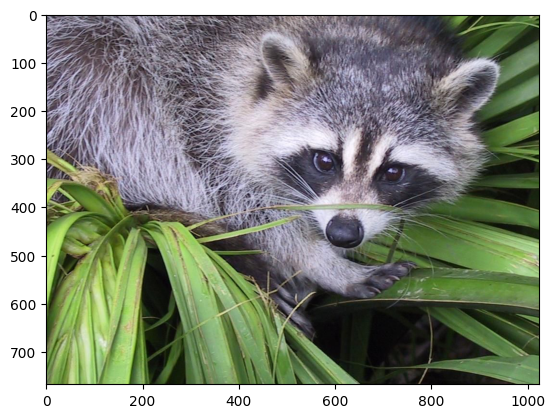

In [16]:
mapache = misc.face() #Devuelve un array que corresponde a la imagen de la cara de un mapache
plt.imshow(mapache) #Comando solo para mostrar la imagen

La imagen del mapache es una matriz, veamos cuáles son sus características.

In [17]:
print('Forma: ',mapache.shape,'\nTamaño: ',mapache.size, '\nDimensiones: ', mapache.ndim)

Forma:  (768, 1024, 3) 
Tamaño:  2359296 
Dimensiones:  3


La forma indica que el objeto se compone de tres matrices, cada una con forma 768 x 1024. Estas tres matrices representan un canal de color RGB.

Lo que haremos será cambiar el color de la imagen a escala de grises usando la fórmula

$\mathrm{Gris} = 0.2126R+0.7152G+0.0722B$

In [18]:
mapache[:,:,0] #Note de una de las matrices que cada valor en la matriz representa el valor R, G o B del pixel

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

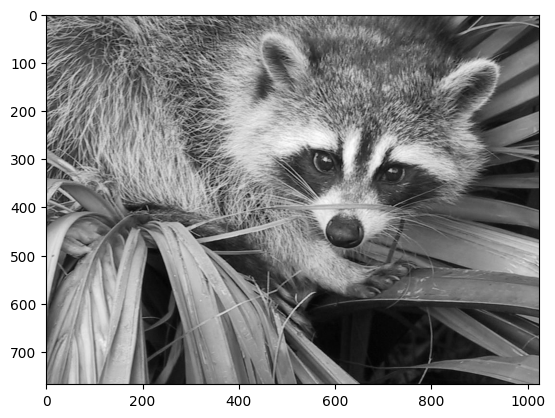

In [19]:
mapache_gris = mapache.dot([0.2126, 0.7152, 0.0722]) #Multiplicamos cada canal de color por los valores de la fórmula

plt.imshow(mapache_gris,cmap='gray')

Ahora utilizaremos descomposición en valores singulares (SVD) en esta matriz para extraer las principales características y luego reconstruir la imagen a partir de ellas.

$$U\Sigma V^T=A$$

donde $U$ y $V^T$ son matrices cuadradas y $\Sigma$ es la matriz con los valores singulares de $A$. Estos valores pueden ser utilizados como medida de la "importancia" de las características de la matriz $A$.

En esencia, estamos usando SVD para comprimir una imagen

In [20]:
la.svd?

Signature:
la.svd(
    a,
    full_matrices=True,
    compute_uv=True,
    overwrite_a=False,
    check_finite=True,
    lapack_driver='gesdd',
)
Docstring:
Singular Value Decomposition.

Factorizes the matrix `a` into two unitary matrices ``U`` and ``Vh``, and
a 1-D array ``s`` of singular values (real, non-negative) such that
``a == U @ S @ Vh``, where ``S`` is a suitably shaped matrix of zeros with
main diagonal ``s``.

Parameters
----------
a : (M, N) array_like
    Matrix to decompose.
full_matrices : bool, optional
    If True (default), `U` and `Vh` are of shape ``(M, M)``, ``(N, N)``.
    If False, the shapes are ``(M, K)`` and ``(K, N)``, where
    ``K = min(M, N)``.
compute_uv : bool, optional
    Whether to compute also ``U`` and ``Vh`` in addition to ``s``.
    Default is True.
overwrite_a : bool, optional
    Whether to overwrite `a`; may improve performance.
    Default is False.
check_finite : bool, optional
    Whether to check that the input matrix contains only finite

In [21]:
U,s,Vt = la.svd(mapache_gris) #Singular Value Decomposition

In [22]:
print(s.shape,'\n',s.ndim) #Análisis de s

(768,) 
 1


In [23]:
s

array([1.04657350e+05, 2.18180300e+04, 1.62207201e+04, 1.16920425e+04,
       1.07020546e+04, 9.75598150e+03, 8.07315104e+03, 6.94272572e+03,
       6.76275718e+03, 6.65757917e+03, 5.97334369e+03, 5.48228630e+03,
       4.55341483e+03, 4.43175119e+03, 4.30076488e+03, 4.14817530e+03,
       3.94917175e+03, 3.79392843e+03, 3.59932669e+03, 3.56122706e+03,
       3.49536736e+03, 3.25270294e+03, 3.09291517e+03, 3.05466854e+03,
       2.90424416e+03, 2.86490372e+03, 2.81360371e+03, 2.72970518e+03,
       2.64908516e+03, 2.61310947e+03, 2.53333984e+03, 2.49487064e+03,
       2.42841398e+03, 2.41451109e+03, 2.35193711e+03, 2.32125747e+03,
       2.28443684e+03, 2.24042997e+03, 2.20566890e+03, 2.15557094e+03,
       2.12487112e+03, 2.06292343e+03, 2.03857568e+03, 1.99858577e+03,
       1.97127870e+03, 1.96520966e+03, 1.94370622e+03, 1.93960573e+03,
       1.90088077e+03, 1.88932518e+03, 1.86478650e+03, 1.85335597e+03,
       1.79723759e+03, 1.78709956e+03, 1.77956897e+03, 1.75298990e+03,
      

s no es la matriz $\Sigma$ que buscamos, ya que debería ser una matriz diagonal. Por lo que debemos construirla con los valores de s.

In [24]:
Sigma = np.diag(s) #Construimos una matriz con s como diagonal
#Computacionalmente es más económico almacenar solo un vector que una matriz diagonal

Ahora que tenemos la aproximación, reconstruiremos la imagen.

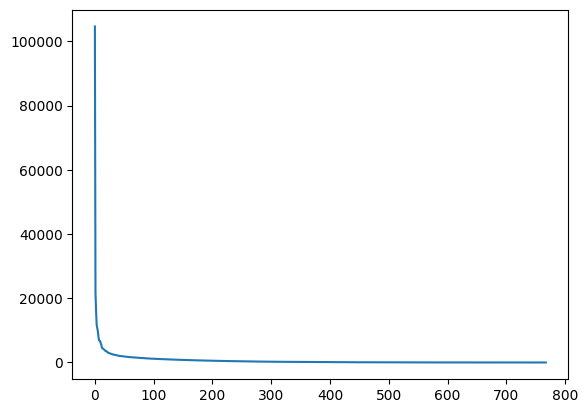

In [25]:
from matplotlib import pyplot as plt

plt.plot(s)
plt.show()

Noten que aunque tenemos 768 valores singulares, la mayoría de ellos tienen un valor pequeño. Por eso, tendría sentido utilizar sólo algunos de ellos para reconstruir una versión más "económica"de la imagen.

In [26]:
k = 100 #k representa la cantidad de valores singulares en s que vale la pena utilizar en la aproximación

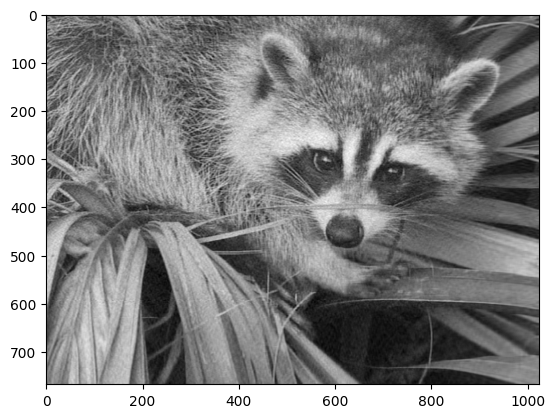

In [27]:
mapache_grisR = np.matmul(np.matmul(U,Sigma[:,:k]),Vt[:k,:]) #Multiplicación de matrices en NumPy
plt.imshow(mapache_grisR,cmap='gray')

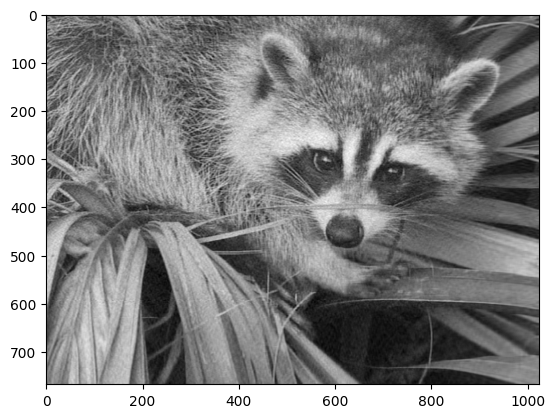

In [28]:
plt.imshow(mapache_grisR,cmap='gray')

## <font color='purple'>**Ejercicio**</font>

Suponga que usted quiere construir una versión no tan "económica" de la imagen y por lo tanto quiere utilizar más valores singulares de s. Si la precisión de los valores de s es 1000, no se necesitan valores más pequeños que eso, ¿de qué manera podría determinarse el valor de k?

In [29]:
a = np.where(s>1000)
print(a)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119], dtype=int64),)


In [ ]:
np.where?

# Módulo scipy.integrate: Integración y EDO

Por motivos históricos, a la integración numérica se le conoce también como cuadratura numérica (*quadrature*).

A pesar de que hay muchos ejemplos de integrales que se pueden calcular analíticamente, en muchos casos es necesario recurrir a los métodos numéricos para aproximar una solución.


La integración numérica en SciPy se categoriza en dos tipos:

* Rutinas que evalúan el integrando como una función de Python (*Gaussian quadrature*)
  * quad, quadrature, fixed_quad
* Rutinas que toman un arreglo con muestras del integrando en puntos dados (*Newton-Cotes*)
  * trapz, simps, romb


### Funciones lambda o anónimas en Python

* Una función anónima es lo que este término dice, una función **sin nombre**.
* A diferencia de las funciones tradicionales, **no se usa def para definirlas** y **se escriben en una sola expresión**.
* Generalmente se usan para escribir operaciones simples.

In [ ]:
def al_cuadrado(x): #Función tradicional
    return x**2

al_cuadrado(2)

4

In [ ]:
def al_cuadrado(x): return x**2 #Escrito en una sola línea

al_cuadrado(2)

4

In [ ]:
lambda x: x**2 #Notación anterior simplificada, es una función lambda

<function __main__.<lambda>(x)>

In [ ]:
quad_lambda = lambda x: x**2 #Hay que guardarlo en una variable
quad_lambda(2) #Se llama de la misma forma que las funciones tradicionales

4

In [ ]:
cos2 = lambda x: np.cos(x)**2

Las funciones lambda son muy útiles cuando se quiere integrar un $f(x)$.

## Integración

Suponga que quiere saber el valor de la integral
$ y = \int_{0}^{1} f(x)dx $ siendo $ f(x) = \frac{4}{(1+x^2)} $
.
-  La función anónima es $f(x)$.
- Del módulo **integrate** se usa **quad()** para calcular la integral simple.

In [30]:
from scipy import integrate

integrate.quad?
funcionPI = lambda x: 4/(1+x**2) #El primer argumento de quad debe ser un objeto "llamable" (función, método o instancia de clase)

a = integrate.quad(funcionPI, 0,1) # Los argumentos 2 y 3 son los límites de integración (Pueden ser +-inf)

Signature:
integrate.quad(
    func,
    a,
    b,
    args=(),
    full_output=0,
    epsabs=1.49e-08,
    epsrel=1.49e-08,
    limit=50,
    points=None,
    weight=None,
    wvar=None,
    wopts=None,
    maxp1=50,
    limlst=50,
    complex_func=False,
)
Docstring:
Compute a definite integral.

Integrate func from `a` to `b` (possibly infinite interval) using a
technique from the Fortran library QUADPACK.

Parameters
----------
func : {function, scipy.LowLevelCallable}
    A Python function or method to integrate. If `func` takes many
    arguments, it is integrated along the axis corresponding to the
    first argument.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

        double func(double x)
        double func(double x, void *user_data)
        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)

    The ``user_data`` is the data contained in the `scipy.

In [31]:
print(a[0])
print(a[1])

3.1415926535897936
3.4878684980086326e-14


El resultado anterior es una tupla cuya primera entrada es la solución y la segunda un número muy cercano a cero, ¿por qué? Porque quad() retorna tanto el resultado como el **error absoluto** en el valor de la integral.

In [ ]:
integrate.quadrature(funcionPI, 0, 1) #Cuadratura gaussiana

(3.1415926111875865, 2.8697166420954545e-08)

¿Cómo integraríamos usando el método de los trapezoides?

<center> <img src="https://pythonnumericalmethods.berkeley.edu/_images/21.03.1-Trapezoid_integral.png" alt="image info" width="350"/> </center>

Debemos calcular $f(x)$ para cada $x$.

In [ ]:
x = np.linspace(0,1,500) #Creamos una serie de puntos entre 0 y 1
y = funcionPI(x) #Determinamos y = f(x) para cada x creado

integrate.trapz?
pi = integrate.trapz(y,x) #Atención que el orden es y,x

In [ ]:
pi

3.1415919842484383

### Solución de integrales múltiples

Así como se puede resolver una integral sencilla, **dblquad()**, **tplquad()** y **nquad()** permiten resolver integrales dobles, triples y múltiples con integrate.

In [ ]:
vol_cubo = lambda x,y,z: 1
v = integrate.tplquad(vol_cubo,0,2,0,2,0,2) #Volumen de un cubo con arista igual a 2
print(v)

(8.0, 8.881784197001252e-14)


## Ecuaciones diferenciales

* El módulo integrate de SciPy también incluye rutinas para la integración de ecuaciones diferenciales ordinarias (ODE).
* **solve_ivp()** es una función para resolver problemas de valor inicial en sistemas de ecuaciones diferenciales ordinarias.
* SciPy.integrate cuenta con otros *solvers* (Runge-Kutta, BDF, LSODA, entre otros).

Suponga que tiene un circuito RC. La respuesta natural de un circuito se refiere al comportamiento del circuito, sin fuentes externas de excitación.

<center> <img src="https://www.norwegiancreations.com/wp-content/uploads/2018/05/RC_nat_graph-1140x760.png" alt="Curva de respuesta natural de un circuito RC ante un impulso unitario" width="500"/> </center>

Aplicando la ley de corriente de Kirchhoff podemos describir el valor de la caída de potencial en el capacitor con la ecuación diferencial de primer orden:

$$\frac{dv(t)}{dt}=-\frac{1}{RC}v(t)$$

In [ ]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

def modelo_RC(t,v,r,c): #r y c son parámetros del modelo
    k = 1/(r*c)
    dvdt = -k * v
    return dvdt

v0 = [15] #Valor inicial
t = [0,2] #Span de tiempo
teval = np.linspace(0,2,11) #Tiempo donde se evalúan las soluciones

sol = integrate.solve_ivp(modelo_RC,t,v0,t_eval=teval,args=[4,0.1])
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.000e-01  4.000e-01  6.000e-01  8.000e-01
             1.000e+00  1.200e+00  1.400e+00  1.600e+00  1.800e+00
             2.000e+00]
        y: [[ 1.500e+01  9.092e+00  5.521e+00  3.348e+00  2.032e+00
              1.232e+00  7.479e-01  4.537e-01  2.752e-01  1.670e-01
              1.013e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0

In [ ]:
?integrate.solve_ivp

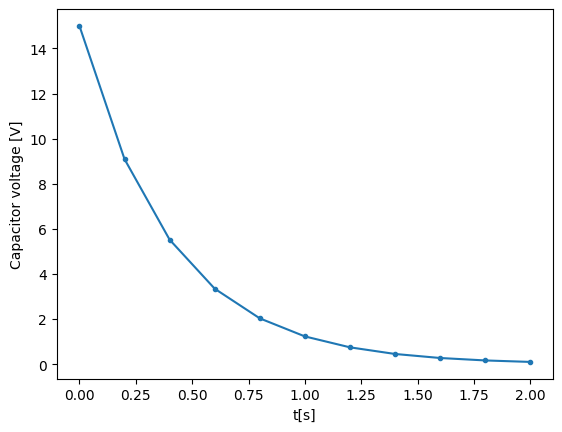

In [ ]:
#Graficamos solamente para ver los resultados

plt.xlabel('t[s]')
plt.ylabel('Capacitor voltage [V]')
plt.plot(sol.t,sol.y.flatten(), marker='.') #la solución del model es un objeto compuesto

### ¿Qué pasa si necesitamos más de una salida?

El modelo debe editarse para que produzca dos salidas.

In [ ]:
def model(t,output):
    A, B = output
    dAdt = A*B
    dBdt = A*B - B
    return dAdt, dBdt

output0 = [0.5,3] #Condiciones iniciales para A y B
t = [0,4]
teval = np.linspace(0,4,100)

sol = integrate.solve_ivp(model, t, output0, t_eval=teval)
print(sol)

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00  4.040e-02 ...  8.485e-01  8.889e-01]
        y: [[ 5.000e-01  5.638e-01 ...  1.371e+01  2.864e+01]
            [ 3.000e+00  2.944e+00 ...  1.290e+01  2.709e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 638
     njev: 0
      nlu: 0


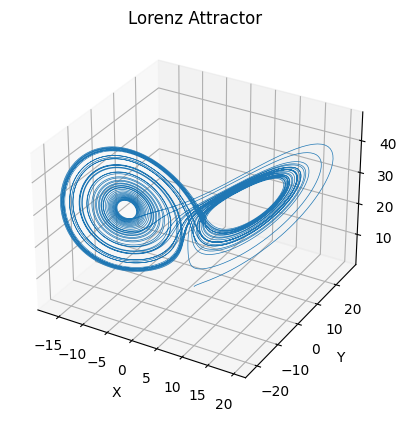

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Define the Lorenz parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Define the initial state [x, y, z]
initial_state = [1.0, 1.0, 1.0]

# Define the time span for integration
t_start = 0.0
t_end = 50.0
t_eval = np.linspace(t_start, t_end, 10000)

# Solve the Lorenz equations using solve_ivp
solution = solve_ivp(lorenz, [t_start, t_end], initial_state, args=(sigma, rho, beta), t_eval=t_eval)

# Extract the solution
x, y, z = solution.y

# Plot the Lorenz attractor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()

# Módulo scipy.interpolate: Interpolación

* Comprende diversos métodos de interpolación. *Ejemplos*: *spline*, multivariada, suavizado.
* También tiene funciones para trabajar con interpolantes polinómicos de Lagrange y Taylor.
* El submódulo **interp1d** es uno de los más convenientes.

In [ ]:
import numpy as np
datos = np.genfromtxt('/content/drive/MyDrive/Classroom/Taller de Computación Científica CNCA/3.SciPy/meteorologia.csv', delimiter=',', names=True)
datos

array([( 1.,  32., 78., 23.9, 14.3), ( 2.,  26., 75., 25. , 12.2),
       ( 3.,  28., 75., 25.8, 15.5), ( 4., 100., 78., 26. , 21.9),
       ( 5., 369., 86., 24.3, 28.7), ( 6., 378., 90., 23.3, 28.9),
       ( 7., 301., 89., 23.3, 29.7), ( 8., 339., 89., 23.3, 29.2),
       (10., 438., 91., 22.4, 30.5), (11., 165., 89., 22.7, 27.9),
       (12.,  65., 84., 23.4, 19.5)],
      dtype=[('Mes', '<f8'), ('Precipitacionmm', '<f8'), ('Humedad', '<f8'), ('Temperaturac', '<f8'), ('Dias_Llovidos', '<f8')])

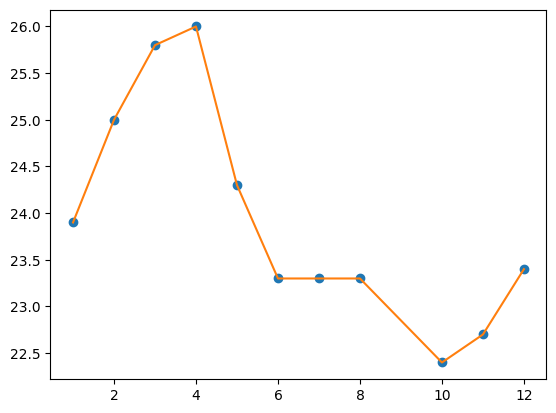

Valor real en setiembre: 23 °C 
Valor interpolado:  22.85 °C


In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

f = interp1d(datos['Mes'],datos['Temperaturac']) #Interpola una función 1-D, el método se cambia con kind
x = np.linspace(1,12,12)
plt.plot(datos['Mes'],datos['Temperaturac'],'o',x,f(x),'-')
plt.show()

print('Valor real en setiembre: 23 °C \nValor interpolado: ',f(9),'°C')

In [ ]:
interp1d?

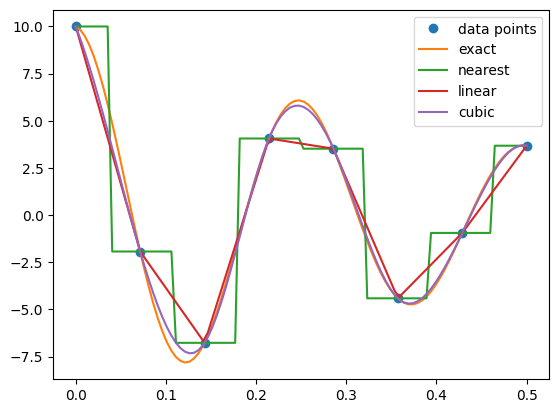

In [ ]:
A, nu, k = 10, 4, 2

def f(x, A, nu, k):
    return A * np.exp(-k*x) * np.cos(2*np.pi * nu * x)

xmax, nx = 0.5, 8
x = np.linspace(0, xmax, nx)
y = f(x, A, nu, k)

f_nearest = interp1d(x, y, kind='nearest')
f_linear  = interp1d(x, y)
f_cubic   = interp1d(x, y, kind='cubic')

x2 = np.linspace(0, xmax, 100)
plt.plot(x, y, 'o', label='data points')
plt.plot(x2, f(x2, A, nu, k), label='exact')
plt.plot(x2, f_nearest(x2), label='nearest')
plt.plot(x2, f_linear(x2), label='linear')
plt.plot(x2, f_cubic(x2), label='cubic')
plt.legend()
plt.show()

Ejemplo tomado de [Learning Scientific Programming with Python](https://scipython.com/book/chapter-8-scipy/examples/scipyinterpolateinterp1d/)

### ¿Qué sucede si tenemos ruido en nuestros datos? ¿Podemos interpolar?

La respuesta es sí. Las funciones *spline* son particularmente buenas para estos casos. Usando el *smoothing factor* podemos evitar que el polinomio interpolador pase por todos los puntos, ignorando un poco el ruido.

#### ¿Cómo agregar ruido artificial a mis datos?

Con NumPy, podemos usar el módulo random para añadir ruido.

Supongamos que estamos midiendo una señal sinusoidal.

In [ ]:
import numpy as np

x = np.arange(0,4*np.pi,0.1)
y = np.cos(x)
y

array([ 1.        ,  0.99500417,  0.98006658,  0.95533649,  0.92106099,
        0.87758256,  0.82533561,  0.76484219,  0.69670671,  0.62160997,
        0.54030231,  0.45359612,  0.36235775,  0.26749883,  0.16996714,
        0.0707372 , -0.02919952, -0.12884449, -0.22720209, -0.32328957,
       -0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
       -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
       -0.9899925 , -0.99913515, -0.99829478, -0.98747977, -0.96679819,
       -0.93645669, -0.89675842, -0.84810003, -0.79096771, -0.7259323 ,
       -0.65364362, -0.57482395, -0.49026082, -0.40079917, -0.30733287,
       -0.2107958 , -0.11215253, -0.01238866,  0.08749898,  0.18651237,
        0.28366219,  0.37797774,  0.46851667,  0.55437434,  0.63469288,
        0.70866977,  0.77556588,  0.83471278,  0.88551952,  0.92747843,
        0.96017029,  0.98326844,  0.9965421 ,  0.99985864,  0.99318492,
        0.97658763,  0.95023259,  0.91438315,  0.86939749,  0.81

In [ ]:
y_ruido = y + np.random.normal(0, 0.05, y.shape) #Agregarmos ruido simplemente añadiendo datos obtenidos de una distribución normal
y_ruido

array([ 1.05862209,  1.0149686 ,  0.91723761,  0.94146249,  0.865373  ,
        0.87756364,  0.84721073,  0.81788041,  0.71862887,  0.62503181,
        0.50573269,  0.46123682,  0.35999681,  0.36946308,  0.25799964,
        0.0750231 ,  0.049176  , -0.17288696, -0.29531521, -0.28315944,
       -0.37006944, -0.50102082, -0.65810648, -0.64972878, -0.71826341,
       -0.86906707, -0.87526643, -1.03035942, -0.94472947, -0.91468424,
       -0.94091406, -0.97711909, -1.07912314, -0.99845409, -0.97604838,
       -0.86997092, -0.92623435, -0.87828624, -0.76448993, -0.65730556,
       -0.63014881, -0.62243855, -0.54777113, -0.340193  , -0.41792999,
       -0.2066567 , -0.15455897,  0.02859647,  0.07030446,  0.19867411,
        0.29782944,  0.28673637,  0.41934333,  0.56956464,  0.7056021 ,
        0.62234123,  0.79396346,  0.88366017,  0.88391895,  0.91950926,
        1.00482205,  0.96230956,  0.97631574,  1.03068787,  0.90474175,
        1.02045904,  1.02880918,  0.87723883,  0.85800915,  0.77

In [ ]:
y_ruido2 = y + np.log(1.05) #Agregamos ruido con una función
y_ruido2

array([ 1.04879016,  1.04379433,  1.02885674,  1.00412665,  0.96985116,
        0.92637273,  0.87412578,  0.81363235,  0.74549687,  0.67040013,
        0.58909247,  0.50238629,  0.41114792,  0.31628899,  0.21875731,
        0.11952737,  0.01959064, -0.08005433, -0.17841193, -0.2744994 ,
       -0.36735667, -0.45605594, -0.53971095, -0.61748586, -0.68860355,
       -0.75235345, -0.80809859, -0.85528198, -0.89343218, -0.922168  ,
       -0.94120233, -0.95034499, -0.94950461, -0.93868961, -0.91800803,
       -0.88766652, -0.84796825, -0.79930987, -0.74217755, -0.67714214,
       -0.60485346, -0.52603378, -0.44147066, -0.35200901, -0.25854271,
       -0.16200564, -0.06336236,  0.0364015 ,  0.13628915,  0.23530253,
        0.33245235,  0.42676791,  0.51730684,  0.6031645 ,  0.68348304,
        0.75745994,  0.82435604,  0.88350295,  0.93430968,  0.97626859,
        1.00896045,  1.0320586 ,  1.04533226,  1.0486488 ,  1.04197508,
        1.02537779,  0.99902276,  0.96317331,  0.91818765,  0.86

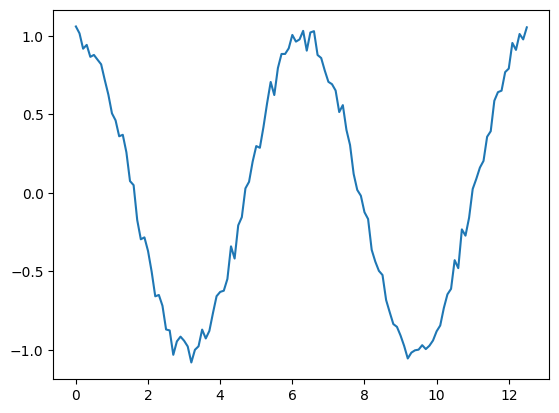

In [ ]:
plt.plot(x,y_ruido)
plt.show()

Ahora vamos a interpolar valores para la señal con ruido, que fue la que medimos en nuestro experimento.

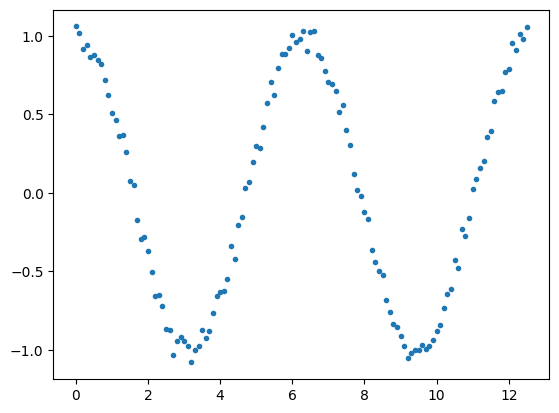

In [ ]:
from scipy.interpolate import UnivariateSpline

plt.plot(x,y_ruido,'.')
plt.show()

fr = UnivariateSpline(x,y,s=0.2) #El smoothing factor distinto de cero hace que no pase por todos los puntos, 'cancelando' el ruido
frx = np.linspace(x.min(),x.max(),100)

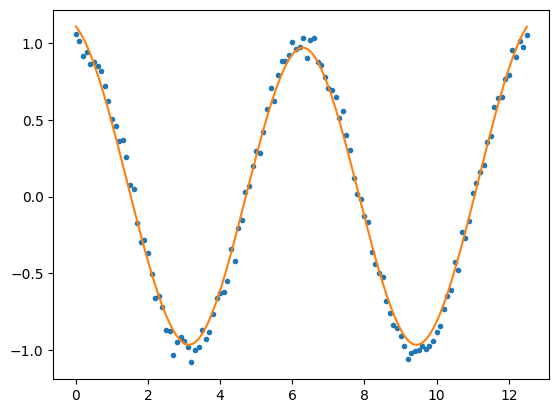

In [ ]:
plt.plot(x,y_ruido,'.',frx,fr(frx))
plt.show()

# Módulo scipy.optimize: Optimización

Provee funciones para maximizar o minimizar funciones objetivo y encontrar raíces.



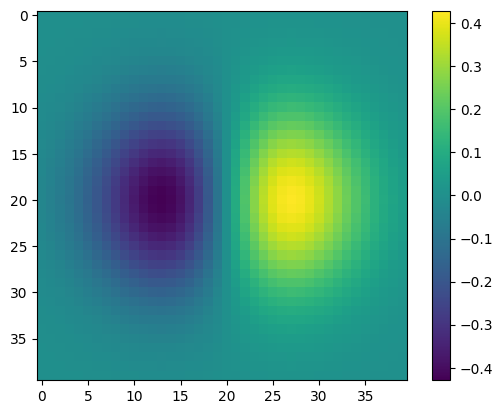

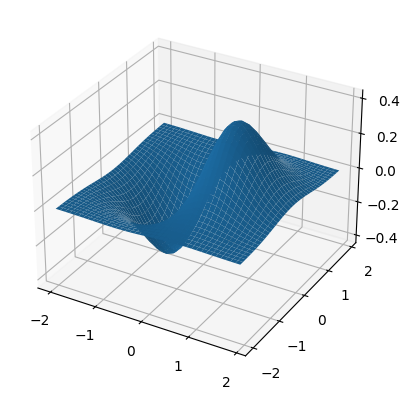

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(ent):
  x,y = ent
  return x/np.exp(x**2 + y**2) #Función que queremos minimizar

x = np.arange(-2,2,0.1)
y = np.arange(-2,2,0.1)
entt = np.meshgrid(x,y)
z= f(entt)

plt.imshow(z)
plt.colorbar()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(entt[0], entt[1], z)
plt.show()

In [ ]:
optimize.minimize?

In [ ]:
ent0 = [0,0]
min = optimize.minimize(f,x0=ent0) #Para el algoritmo debemos dar una condición inicial x0 para todas las variables
min

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.42888194247944217
        x: [-7.071e-01 -6.691e-09]
      nit: 5
      jac: [-1.758e-06  3.725e-09]
 hess_inv: [[ 5.793e-01 -5.866e-09]
            [-5.866e-09  1.000e+00]]
     nfev: 18
     njev: 6

In [ ]:
min = optimize.minimize(f,x0=ent0,method='Nelder-Mead') #Cambiamos de algoritmo
min

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -0.4288819413492686
             x: [-7.071e-01  4.227e-05]
           nit: 65
          nfev: 127
 final_simplex: (array([[-7.071e-01,  4.227e-05],
                       [-7.071e-01,  5.702e-05],
                       [-7.071e-01,  1.062e-04]]), array([-4.289e-01, -4.289e-01, -4.289e-01]))

# Módulo scipy.signal: Procesamiento de señales

* Contiene filtros y algunas técnicas de diseño de filtros.
* También cuenta con algunos métodos de interpolación.


In [ ]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

samplerate, data = wavfile.read('/content/drive/MyDrive/Classroom/Taller de Computación Científica CNCA/3.SciPy/pajarito.wav') #Devuelve la cantidad de muestras por segundo y los datos

#Datos tienen forma (número de datos, número de canales)
print('Muestras por segundo: %d \nNúmero de datos: %d\nNúmero de canales: %d' %(samplerate,data.shape[0],data.shape[1]))

Muestras por segundo: 44100 
Número de datos: 747007
Número de canales: 2


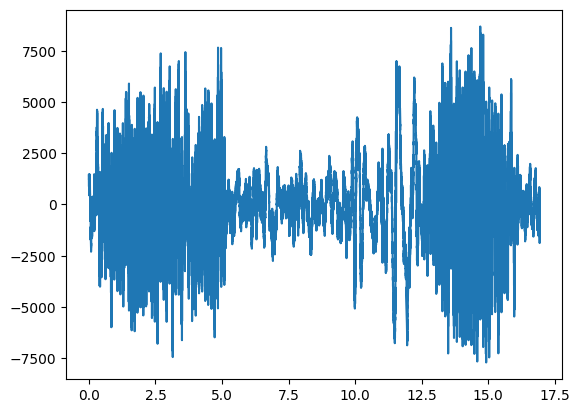

In [ ]:
length = data.shape[0] / samplerate #Longitud del audio en segundos
time = np.linspace(0., length, data.shape[0]) #Creamos tantos datos de tiempo como muestras
plt.plot(time, data[:,0]) #Ploteamos solo un canal
plt.show()

Podemos aplicar una transformada de Fourier para ver el dominio de la frecuencia. Esto lo logramos con el módulo scipy.fft.

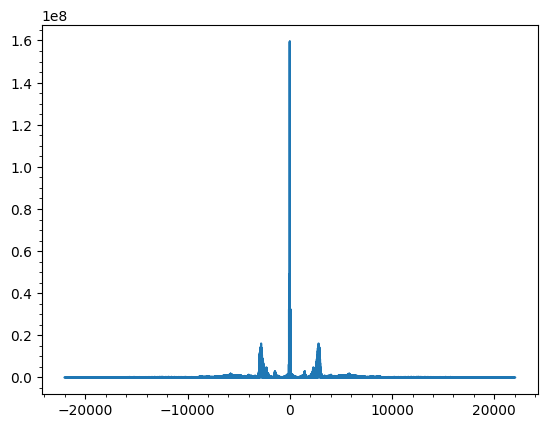

In [ ]:
from scipy.fft import fft, fftfreq

yf = fft(data[:,0])
xf = fftfreq(data.shape[0], 1/samplerate) #Valores de frecuencia

plt.plot(xf, np.abs(yf)) #Se utiliza el valor absoluto porque porque los valores de yf son complejos
plt.minorticks_on()
plt.show()


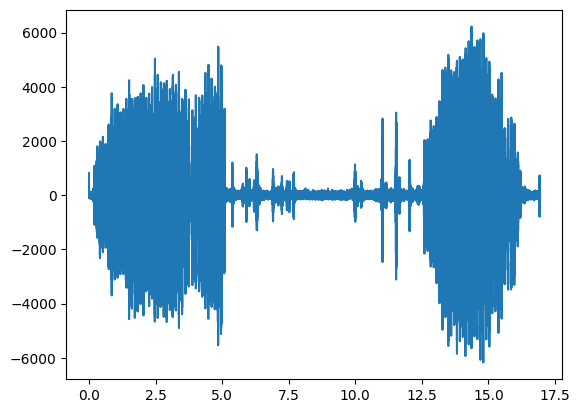

In [ ]:
from scipy.signal import butter,sosfilt

#sos =  butter(2,1000,'hp',output='sos',fs=samplerate) #Filtro paso alto de orden 2, Butterworth
sos =  butter(1,0.09,'hp',output='sos') #Filtro paso alto de orden 1, Butterworth
filtered = sosfilt(sos, data[:,0])
plt.plot(time, filtered)
plt.show()

wavfile.write("pajarito_filt.wav", samplerate, filtered.astype(np.int16))

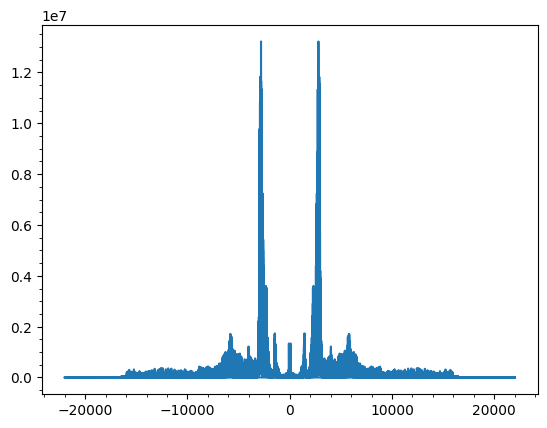

In [ ]:
from scipy.fft import fft, fftfreq

yff = fft(filtered)

plt.plot(xf, np.abs(yff))
plt.minorticks_on()
plt.show()

# Módulo scipy.stats: Estadística

Ofrece clases para representar variables aleatorias con gran variedad de distribuciones de probabilidad. Estas variables aleatorias pueden ser utilizadas para:

* Realizar estadística descriptiva.
* Generar muestras aleatorias que sigan la distribución asociada a la variable aleatoria.

In [ ]:
from scipy import stats

variableDistNormal = stats.norm(1,0.5) #Creamos una variable aleatoria normalmente distribuida (mean, std)
print(variableDistNormal) #Esto retorna un objeto de Python, no un arreglo de muestras
variableDistNormal.mean()


1.0

Es posible utilizar estadística descriptiva sobre esta variable aleatoria.

In [ ]:
print('Media: ',variableDistNormal.mean())
print('Mediana: ',variableDistNormal.median())
print('Varianza: ',variableDistNormal.var())

Media:  1.0
Mediana:  1.0
Varianza:  0.25


Además, con una variable aleatoria podemos evaluar su función de densidad de probabilidad.

In [ ]:
variableDistNormal.pdf([0,1,2]) #Recibe como parámetro un arreglo de valores donde evaluar la función

array([0.10798193, 0.79788456, 0.10798193])

In [ ]:
variableDistNormal.cdf([0,1,2]) #Función de distribución acumulada

array([0.02275013, 0.5       , 0.97724987])

## Muestras aleatorias de una distribución

Podemos generar muestras aleatorias que sigan la distribución asociada a la variable aleatoria que creamos. La funcion **rvs()** de stats nos permite realizar esta tarea.

In [ ]:
variableDistNormal.rvs()

0.9861653164407528

### *stats* permite representar distribuciones continuas, multivariadas y discretas. Posee alrededor de 80 de ellas. Se pueden consultar [aquí](https://docs.scipy.org/doc/scipy/reference/stats.html).

## Estadística descriptiva de un conjunto de datos

Tomemos los datos meteorológicos que utilizamos anteriormente. ¿Qué podemos decir de ellos?

In [ ]:
datos

array([( 1.,  32., 78., 23.9, 14.3), ( 2.,  26., 75., 25. , 12.2),
       ( 3.,  28., 75., 25.8, 15.5), ( 4., 100., 78., 26. , 21.9),
       ( 5., 369., 86., 24.3, 28.7), ( 6., 378., 90., 23.3, 28.9),
       ( 7., 301., 89., 23.3, 29.7), ( 8., 339., 89., 23.3, 29.2),
       (10., 438., 91., 22.4, 30.5), (11., 165., 89., 22.7, 27.9),
       (12.,  65., 84., 23.4, 19.5)],
      dtype=[('Mes', '<f8'), ('Precipitacionmm', '<f8'), ('Humedad', '<f8'), ('Temperaturac', '<f8'), ('Dias_Llovidos', '<f8')])

In [ ]:
stats.describe(datos['Dias_Llovidos']) #Descripción general de los datos

DescribeResult(nobs=11, minmax=(12.2, 30.5), mean=23.481818181818184, variance=49.037636363636366, skewness=-0.49636041644762346, kurtosis=-1.417325149777104)

In [ ]:
stats.mode(datos['Humedad']) #La moda, el valor más repetido

ModeResult(mode=89.0, count=3)

También podemos obtener la frecuencia acumulada de los datos.

In [ ]:
cdf = stats.cumfreq(datos['Precipitacionmm'], numbins=4) #numbins es la cantidad de categorías
cdf

CumfreqResult(cumcount=array([ 4.,  6.,  9., 11.]), lowerlimit=-42.66666666666667, binsize=137.33333333333334, extrapoints=0)

# Módulo scipy.sparse: Matrices dispersas
    
## ¿Qué es una matriz dispersa?

* Es una matriz en la cual **la mayoría de sus entradas son cero**.
* Se utilizan en la solución de ecuaciones diferenciales en áreas como la ingeniería, así como en el análisis numérico y la teoría de grafos o redes.
* La representación de estas matrices se puede dar en distintos formatos. *Ejemplo:* COO, CSR, CSC.

$$M = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 \\ 2 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 4 & 0 \\ 0 & 0 & 0 & 3 & 0 \\  0 & 0 & 0 & 0 & 5\end{bmatrix}$$

In [ ]:
from scipy import sparse

ind_f = np.array([0,1,3,2,4]) #Indices de las filas
ind_c = np.array([0,0,3,3,4]) #Indices de las columnas
datos = np.array([1,2,3,4,5]) #Datos
mat = sparse.coo_matrix((datos,(ind_f,ind_c))) #Crea una matriz dispersa en formato COO (COOrdinate)

print(mat)

  (0, 0)	1
  (1, 0)	2
  (3, 3)	3
  (2, 3)	4
  (4, 4)	5


In [ ]:
mat.toarray() #Imprime la matriz creada como un array, mas sencillo de visualizar

array([[1, 0, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 5]])

In [ ]:
#Noten que el resultado es una estructura de datos que representa la matriz
#Estos objetos tienen atributos que podemos extraer

print(mat.shape)
print(mat.size)
print(mat.nnz) #Número de valores que no son cero
print(mat.data)

(5, 5)
5
5
[1 2 3 4 5]


**find()** devuelve los valores y los índices de los elementos que no son cero en la matriz.

In [ ]:
sparse.find(mat)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([0, 0, 3, 3, 4], dtype=int32),
 array([1, 2, 4, 3, 5]))

También se pueden generar matrices dispersas aleatorias, hacer operaciones como el producto de Kronecker, comprobar si una matriz es de cierto tipo o incluso salvar y cargar una matriz en un archivo formato **.npz**. Más información de este formato [aquí](https://imageio.readthedocs.io/en/stable/format_npz.html).

\\
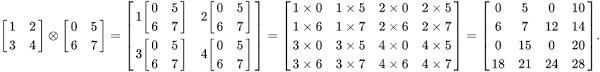

In [ ]:
A = sparse.rand(3,3,density=0.25, format='coo') #Se crean dos matrices aleatorias de 3x3 con cierta densidad y formato COO
B = sparse.rand(3,3,density=0.4, format='coo')
print(A.toarray(),'\n')
print(B.toarray(),'\n')

[[0.73539846 0.         0.        ]
 [0.         0.70921194 0.        ]
 [0.         0.         0.        ]] 

[[0.         0.39910327 0.        ]
 [0.         0.06320594 0.        ]
 [0.85332856 0.         0.47194427]] 



In [ ]:
C = sparse.kron(A,B,format='coo') #Calcula el producto de Kronecker entre A y B, lo guarda en formato COO
print(C)
print(C.toarray(),'\n')

  (3, 4)	0.28304880646846764
  (4, 4)	0.04482641008640488
  (5, 5)	0.3347085100190231
  (5, 3)	0.605190802527591
  (0, 1)	0.2934999345879009
  (1, 1)	0.04648155416135248
  (2, 2)	0.34706709073348774
  (2, 0)	0.6275365127704043
[[0.         0.29349993 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.04648155 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.62753651 0.         0.34706709 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.28304881 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.04482641 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.6051908  0.         0.33470851
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.       

In [ ]:
sparse.save_npz('C.npz', C) #Guarda el producto anterior en el archivo C.npz
C_archivo = sparse.load_npz('C.npz') #Carga la matriz de C.npz nuevamente

print(C_archivo)

print(sparse.issparse(C_archivo)) #No comprueba si la matriz es dispersa, comprueba si es un objeto sparse

  (3, 4)	0.28304880646846764
  (4, 4)	0.04482641008640488
  (5, 5)	0.3347085100190231
  (5, 3)	0.605190802527591
  (0, 1)	0.2934999345879009
  (1, 1)	0.04648155416135248
  (2, 2)	0.34706709073348774
  (2, 0)	0.6275365127704043
True


*sparse* tiene además dos submódulos:

* *csgraph*, algoritmos de grafos basados en representaciones de matrices dispersas.
* *linalg*, álgebra lineal para matrices dispersas.

### Para explorar más de _sparse_, se puede consultar [aquí](https://docs.scipy.org/doc/scipy/reference/sparse.html)

## Grafos

Un grafo es un conjunto de **vértices** (también llamados **nodos**) que se conectan entre sí a través de **aristas**. A las aristas se les puede asignar un valor llamado **peso**.

<center> <img src="https://1.bp.blogspot.com/-3elxtb5XHS0/YPujqjqBWOI/AAAAAAAA8_c/92zjDP1MgJUX6FOf4ICxwLW_NUoAHJGaACLcBGAsYHQ/s940/GRAPH.jpg" alt="image info" width="300"/> </center>

Un grafo es una buena representación para sistemas que se basan en redes. Por ejemplo:

* Movilidad entre ciudades.
* Células y sus interacciones.
* Contactos sociales.
* Átomos, moléculas y sus interacciones.
* Procesamiento del lenguaje.

Una de las representaciones de los grafos es a través de matrices. Estas pueden ser tanto densas como dispersas.

Los nodos se ubican en columnas y filas de la matriz, y cada entrada corresponde al peso de la relación entre ambos nodos.

Determinemos si esta matriz es densa o dispersa.




In [ ]:
filas =    [0,1,1,1,2,2,3,3,3,3,4,4,5,5]
columnas = [1,0,2,3,1,3,1,2,4,5,3,5,3,4]
valores =  [1,1,1,1,1,1,1,1,1,1,1,1,1,1]

m_grafo = sparse.coo_matrix((valores,(filas,columnas)), shape=(6,6))

no_cero= m_grafo.nnz #Elementos que no son cero

densidad = no_cero / np.prod(m_grafo.shape) #Elementos que no son cero/total de elementos
print(densidad) # Podemos decir que la matriz es ligeramente dispersa, ya que su densidad es menor al 50%

0.3888888888888889


Teniendo la representación matricial de un grafo, podemos usar sparse para aplicar algoritmos comunes aplicados a los grafos. Entre ellos están:

* Determinar el camino más corto entre nodos (Dijkstra, Bellman-Ford, etc.)
* Búsqueda de anchura o BFS.
* Árbol recubridor mínimo o MST (Kruskal).

Todos estos algoritmos son importantes en el diseño de redes (cableado telefónico, eléctrico, TV, hidráulica, entre otros).

Utilicemos un algoritmo de sparse para calcular el camino más corto entre el vértice 3 y el vértice 1 de nuestro grafo.

In [ ]:
dist_min=sparse.csgraph.shortest_path?

In [ ]:
#Devuelve la distancia más pequeña entre el nodo 1 y el 3
dist_min=sparse.csgraph.shortest_path(m_grafo, directed=False, indices=0)
print(dist_min)
dist_min[3]

[0. 1. 2. 2. 3. 3.]


2.0